# CORE TASK 1: wo spin coupling

Write a program to construct a lattice and evolve it with time according to the Metropolis‐Hastings algorithm. 

It is probably simplest to parameterise your functions in terms of the dimensionless quantities 𝛽𝐽 and 𝛽𝜇𝐻.

The energy of the 2D Ising system is given by 

$𝐸 = -𝐽 \Sigma_i \Sigma_j 𝑠_i 𝑠_j - 𝜇𝐻 \Sigma_{i=1}^N 𝑠_i$

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

### No Coupling

Set 𝛽𝐽 = 0 so there is no coupling. In such a case, only thermal motion and the external magnetic field affect the flipping of the spins. Do a few simulations with −3 < 𝛽𝜇𝐻 < 3 and observe what happens by plotting the lattice configuration after 1, 10, 100, 1000, 10,000 and (if you have time) 100,000 “time steps” (you can display the lattice configuration using the matplotlib.pyplot.matshow() function). Try both starting with a random lattice and a lattice with all spins in one direction.

#### 𝛽𝐽 = 0 and 𝛽𝜇𝐻 = 0

We try 𝛽𝐽 = 0 and 𝛽𝜇𝐻 = 0 first to test the model

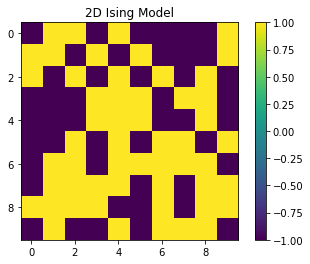

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_system(w,type):
    if type == "random":
        lattice = np.random.choice([-1, 1], size=(w, w))
    elif type == "spinup":
        lattice = np.ones((w, w))
    elif type == "spindown":
        lattice = -np.ones((w, w))
    return lattice

def calculate_beta_energy_difference(lattice, i, j, betaJ, betamuH):
    w = len(lattice)
    neighbours_sum = lattice[(i + 1) % w, j] + lattice[i, (j + 1) % w] + lattice[(i - 1) % w, j] + lattice[i, (j - 1) % w] 
    return 2 * lattice[i,j] * (neighbours_sum*betaJ + betamuH)

def metropolis_acceptance_probability(beta_energy_difference):
    return min(1, np.exp(-beta_energy_difference))

def metropolis_hastings_step(lattice, betaJ, betamuH):
    w = len(lattice)
    
    # Choose a random site
    i, j = np.random.randint(0, w, size=2)
    
    # Calculate the energy change
    beta_delta_E = calculate_beta_energy_difference(lattice, i, j, betaJ, betamuH)
    
    # Acceptance probability
    probability_accept = metropolis_acceptance_probability(beta_delta_E)

    # Accept or reject the proposed configuration
    if np.random.rand() < probability_accept:
        lattice[i, j] *= -1  # Flip the spin

    return lattice

def metropolis_hastings_simulation(w, type, time_steps, betaJ, betamuH):
    lattice = initialize_system(w, type)

    N = w**2

    if time_steps > 0:
        for _ in range(time_steps):
            for _ in range(N):
                metropolis_hastings_step(lattice, betaJ, betamuH)

    return lattice

# Parameters
w = 10  # N = w**2 is the total number of spins in the lattice
time_steps = 10 # Number of Metropolis steps
betaJ = 0  # Inverse temperature
betamuH = 0.0  # External magnetic field
type = "spinup"  # Initial spin configuration

# Run the simulation
final_configuration = metropolis_hastings_simulation(w, type, time_steps, betaJ, betamuH)

# Plot the final configuration
plt.imshow(final_configuration, cmap='viridis', interpolation='nearest',vmin=-1, vmax=1)
plt.title('2D Ising Model')
plt.colorbar()

plt.show()


In [130]:
time_steps_value = [1, 5, 100]

def evolve_and_plot(w, type, betaJ, betamuH, time_steps_value):
    fig, ax = plt.subplots(1, len(time_steps_value), figsize=(12, 4))

    for i in range(len(time_steps_value)):
        time_steps = time_steps_value[i]
        lattice = metropolis_hastings_simulation(w, type, time_steps, betaJ, betamuH)
        ax[i].matshow(lattice, cmap='gray', interpolation='nearest',vmin=-1, vmax=1)
        ax[i].set_title('Time step: ' + str(time_steps))
        

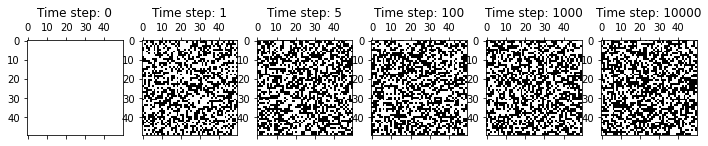

In [132]:
evolve_and_plot(w=50,type='spinup',betaJ=0,betamuH=0,time_steps_value=[0,1,5,100,1000,10000])

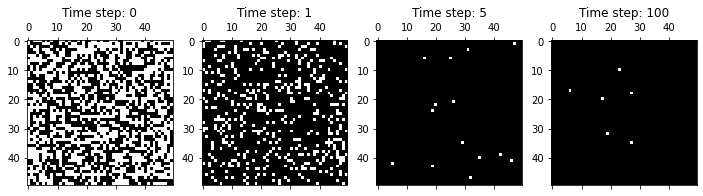

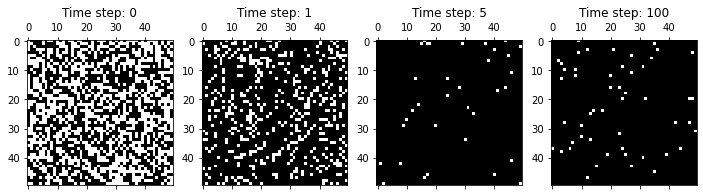

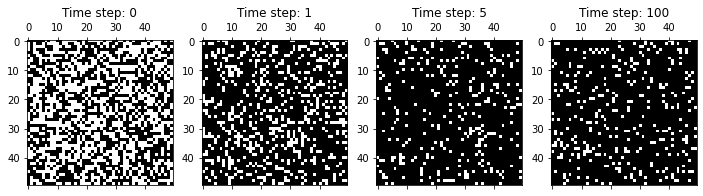

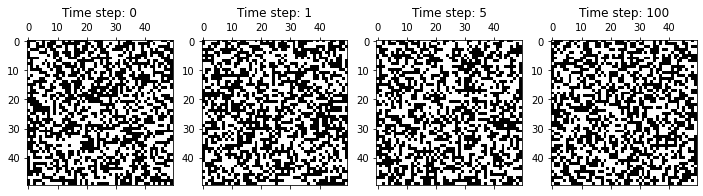

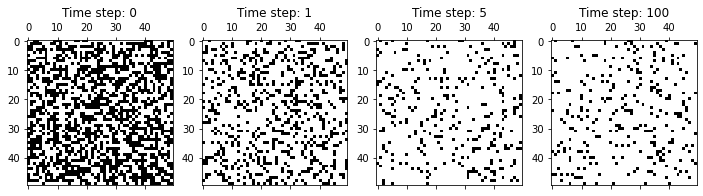

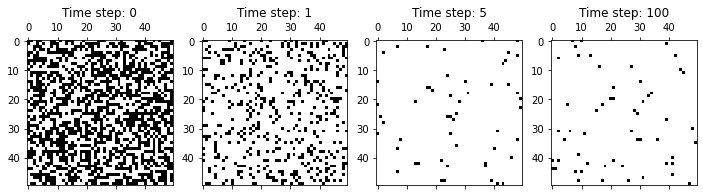

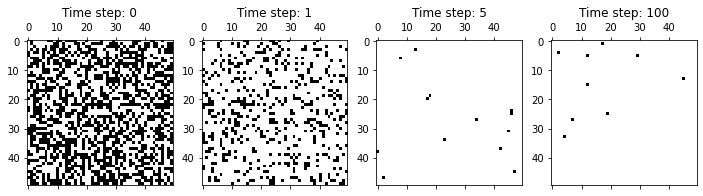

In [134]:
betamuH_array = np.array([-3,-2,-1,0,1,2,3])
for i in range(len(betamuH_array)):
    evolve_and_plot(w=50,type='random',betaJ=0,betamuH=betamuH_array[i],time_steps_value=[0,1,5,100])

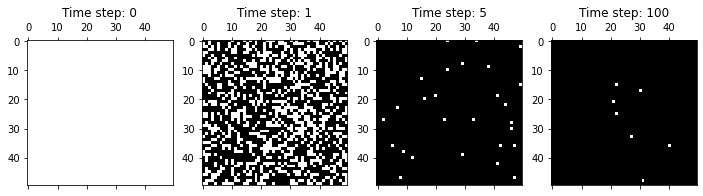

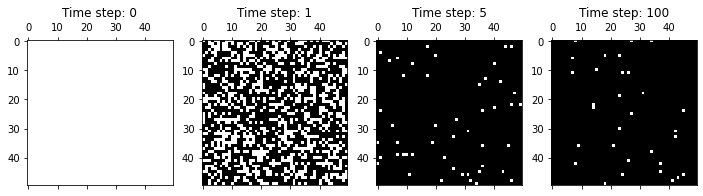

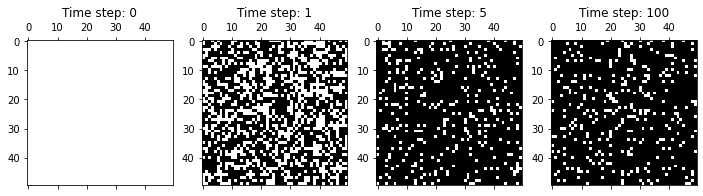

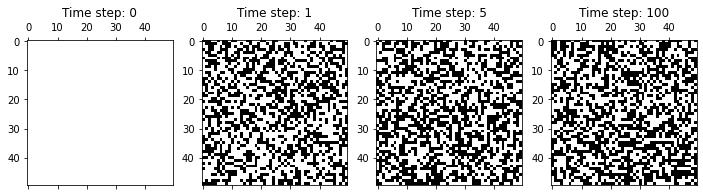

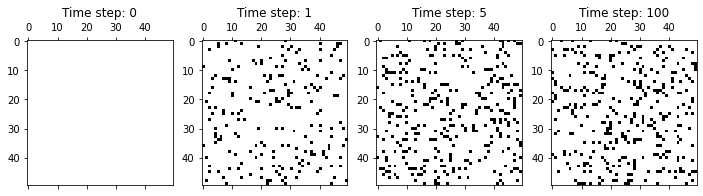

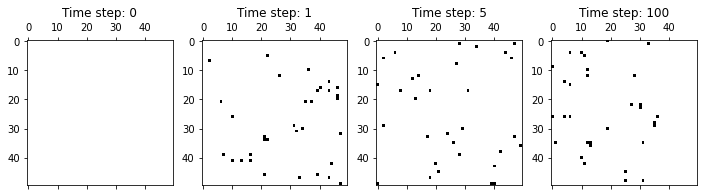

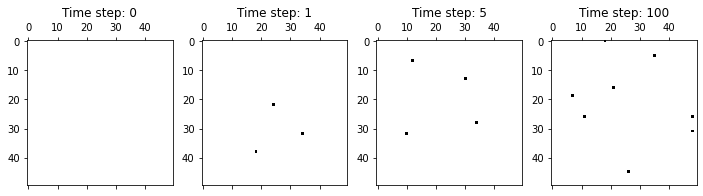

In [135]:
betamuH_array = np.array([-3,-2,-1,0,1,2,3])
for i in range(len(betamuH_array)):
    evolve_and_plot(w=50,type='spinup',betaJ=0,betamuH=betamuH_array[i],time_steps_value=[0,1,5,100])

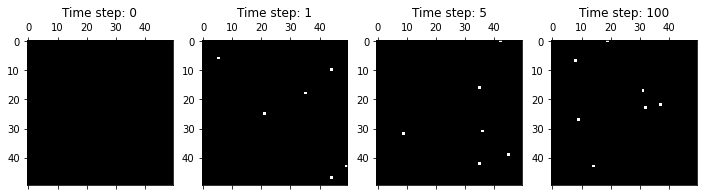

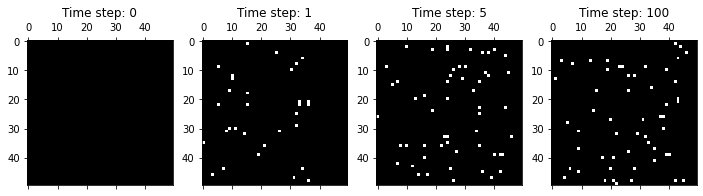

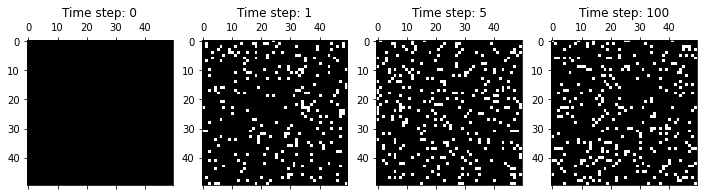

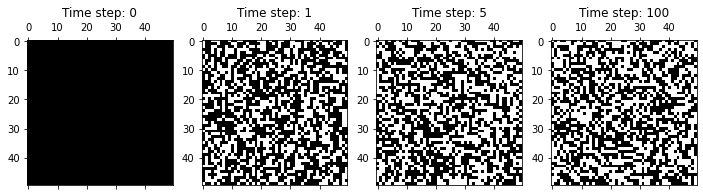

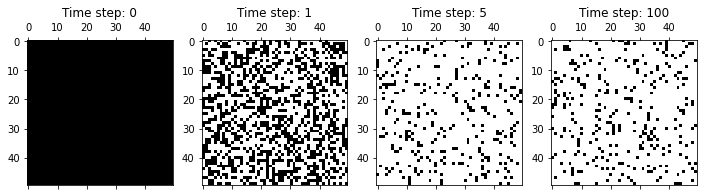

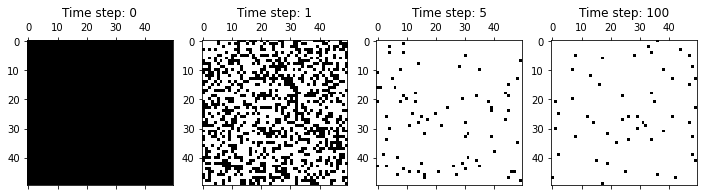

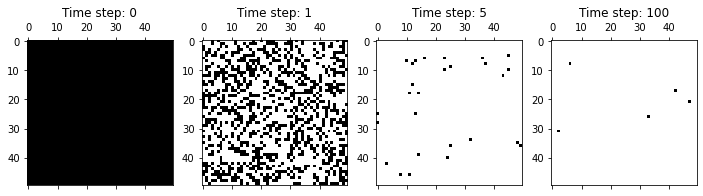

In [136]:
betamuH_array = np.array([-3,-2,-1,0,1,2,3])
for i in range(len(betamuH_array)):
    evolve_and_plot(w=50,type='spindown',betaJ=0,betamuH=betamuH_array[i],time_steps_value=[0,1,5,100])

Compute the relative magnetisation 𝑀 of the lattice and plot it as a function of time for at least 10,000 steps. Qualitatively explain the system behaviour.
In the case of no coupling, an analytical expression for the mean magnetisation ⟨𝑀 ⟩ exists. The expression is:

⟨𝑀⟩ = tanh(𝛽𝜇𝐻)

Test whether the Monte Carlo method correctly reproduces the above analytical formula.

In [137]:
def compute_magnetisation(lattice):
    return (np.sum(lattice))/(lattice.shape[0]**2)

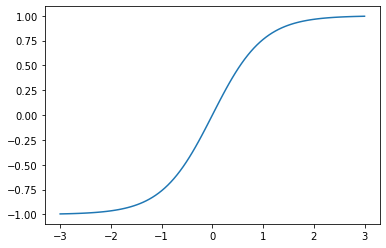

In [143]:
x = 10
betamuHs_analytical = np.linspace(-3,3,x) # betaMuH values to plot
M_values = np.zeros(x)
for i in range(x):
    lattice = metropolis_hastings_simulation(w=50,type='random',time_steps=100,betaJ=0,betamuH=betamuHs_analytical[i])
    M_values[i] = compute_magnetisation(lattice)

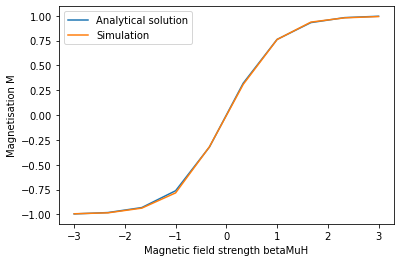

In [146]:
betamuHs_analytical = np.linspace(-3,3,x) # betaMuH values to plot
M_analytical = np.tanh(betamuHs_analytical) # analytical solution for the magnetisation
plt.plot(betamuHs_analytical,M_analytical,label='Analytical solution')
plt.plot(betamuHs_analytical,M_values,label='Simulation')
plt.xlabel ('Magnetic field strength betaMuH')
plt.ylabel ('Magnetisation M')
plt.legend(loc='upper left')
plt.show()

# Core Task 2: only spin coupling 

Now let us investigate coupling without an external magnetic field (𝐻 = 0). Try the same as previously, using different starting conditions, but introduce some ferro‐ magnetic coupling (𝛽𝐽 = 0.2) or anti‐ferromagnetic coupling (𝛽𝐽 = −0.2). Qualitatively explain the system behaviour.

random lattice, betaJ=10
random lattice, betaJ=-10


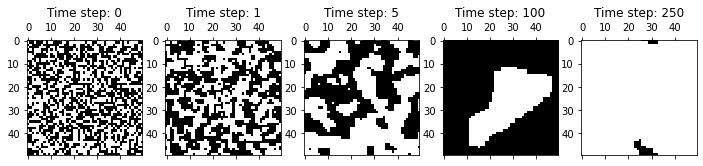

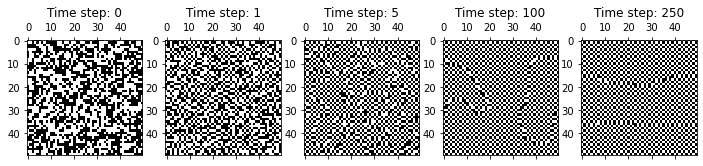

In [157]:
evolve_and_plot(w=50,type='random',betaJ=10,betamuH=0,time_steps_value=[0,1,5,100,250])
print('random lattice, betaJ=10')
evolve_and_plot(w=50,type='random',betaJ=-10,betamuH=0,time_steps_value=[0,1,5,100,250])
print('random lattice, betaJ=-10')

random lattice, betaJ=3
random lattice, betaJ=-3


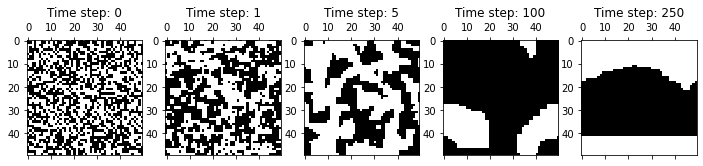

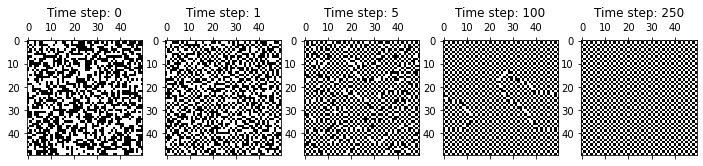

In [156]:
print('random lattice, betaJ=3')
evolve_and_plot(w=50,type='random',betaJ=3,betamuH=0,time_steps_value=[0,1,5,100,250])
print('random lattice, betaJ=-3')
evolve_and_plot(w=50,type='random',betaJ=-3,betamuH=0,time_steps_value=[0,1,5,100,250])


random lattice, betaJ=0.2
random lattice, betaJ=-0.2


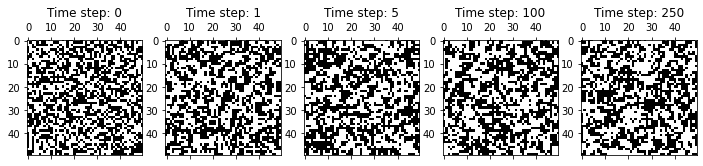

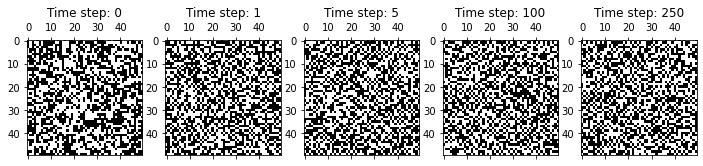

In [158]:
evolve_and_plot(w=50,type='random',betaJ=0.2,betamuH=0,time_steps_value=[0,1,5,100,250])
print('random lattice, betaJ=0.2')
evolve_and_plot(w=50,type='random',betaJ=-0.2,betamuH=0,time_steps_value=[0,1,5,100,250])
print('random lattice, betaJ=-0.2')

random lattice, betaJ=0.2
random lattice, betaJ=-0.2


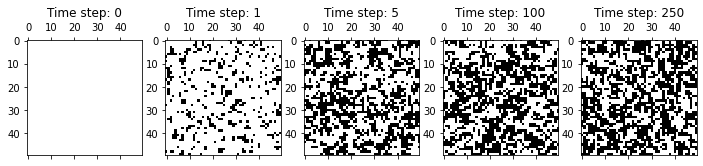

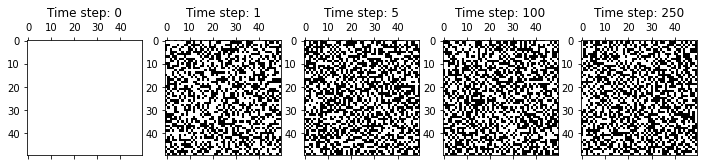

In [159]:
evolve_and_plot(w=50,type='spinup',betaJ=0.2,betamuH=0,time_steps_value=[0,1,5,100,250])
print('random lattice, betaJ=0.2')
evolve_and_plot(w=50,type='spinup',betaJ=-0.2,betamuH=0,time_steps_value=[0,1,5,100,250])
print('random lattice, betaJ=-0.2')

random lattice, betaJ=-0.2
random lattice, betaJ=0.2


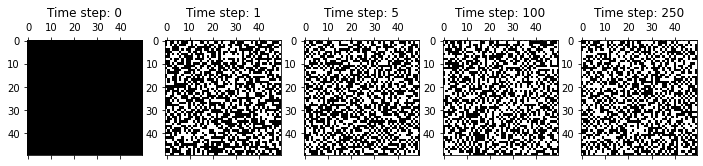

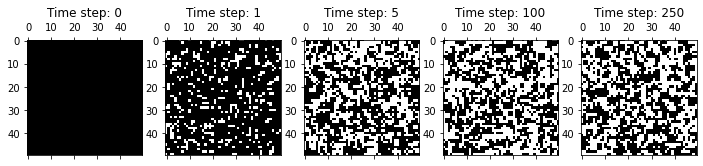

In [160]:
evolve_and_plot(w=50,type='spindown',betaJ=-0.2,betamuH=0,time_steps_value=[0,1,5,100,250])
print('random lattice, betaJ=-0.2')
evolve_and_plot(w=50,type='spindown',betaJ=0.2,betamuH=0,time_steps_value=[0,1,5,100,250])
print('random lattice, betaJ=0.2')

For this case, no field and only coupling, Lars Onsanger discovered an analytical solution for the case
of an infinite lattice:

where 𝑇𝑐 is the critical temperature given by
𝑇𝑐= 2𝐽√. 𝑘𝑏 ln(1 + 2)
⎧{0 if 𝑇 ≥ 𝑇𝑐
⟨𝑀⟩=⎨ −4 18 {⎩±(1−sinh(2𝛽𝐽) )
if𝑇 <𝑇𝑐

Test whether the Monte Carlo method correctly reproduces the above analytical formula. Comment on any unusual behaviour of the system you notice around the critical point.

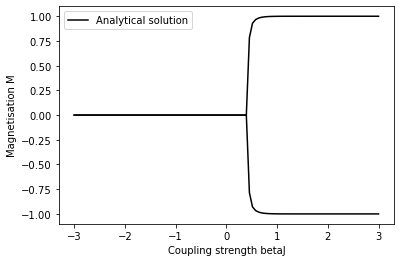

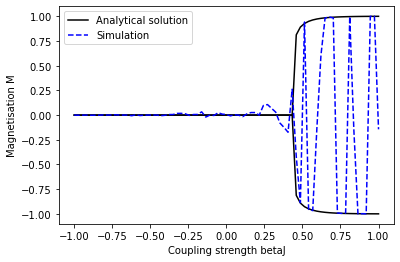

In [166]:
x = 75
betaJ_values = np.linspace(-1,1,x) 

M_values = np.zeros(x)
for i in range(x):
    lattice = metropolis_hastings_simulation(w=50,type='random',time_steps=500,betaJ=betaJ_values[i],betamuH=0)
    M_values[i] = compute_magnetisation(lattice)

 # analytical solution for the magnetisation
M_analytical_values= []

for J_beta in betaJ_values:
    if J_beta >= np.log(1+np.sqrt(2))/2: # if the coupling is strong enough the system will be ordered
        M_analytical_values.append((1-(np.sinh(2*J_beta))**(-4))**(1/8))   

    else:
        M_analytical_values.append(0)

M_analytical_values_negative = np.array(M_analytical_values)*-1



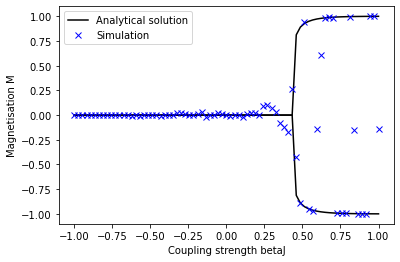

In [168]:
plt.plot(betaJ_values,M_analytical_values,label='Analytical solution',color='black',linestyle='-')
plt.plot(betaJ_values,M_analytical_values_negative,color='black',linestyle='-')

plt.plot(betaJ_values,M_values,'x',label='Simulation',color='blue')

plt.xlabel ('Coupling strength betaJ')
plt.ylabel ('Magnetisation M')
plt.legend(loc='upper left')
plt.show()

## Supplementary task: Investigate the heat capacity near the phase transition. 

The fluctuation‐ dissipation theorem states that the heat capacity of the system is given by

𝐶= 𝜎𝐸 𝑘𝐵𝑇2

with 𝜎𝐸 being the standard deviation of fluctuations in the system energy 𝐸. Plot a graph of the heat capacity of the system as a function of temperature for 𝐻 = 0, evaluating what happens close to the critical temperature 𝑇𝑐 for a number of different lattice sizes.

## Note on how to implement this logic

Here, we define an array of temperatures to plot over and update the energy each time step so that we can find energy variance.

This means at each time step of the metropolis hastings algorithm, we need to calculate the energy and append into an array, in which we then calculate the standard deviation of the energy array.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_system(w,type):
    if type == "random":
        lattice = np.random.choice([-1, 1], size=(w, w))
    elif type == "spinup":
        lattice = np.ones((w, w))
    elif type == "spindown":
        lattice = -np.ones((w, w))
    return lattice

def calculate_beta_energy_difference(lattice, i, j, betaJ, betamuH):
    w = len(lattice)
    neighbours_sum = lattice[(i + 1) % w, j] + lattice[i, (j + 1) % w] + lattice[(i - 1) % w, j] + lattice[i, (j - 1) % w] 
    return 2 * lattice[i,j] * (neighbours_sum*betaJ + betamuH)

def metropolis_acceptance_probability(beta_energy_difference):
    return min(1, np.exp(-beta_energy_difference))

def metropolis_hastings_step(lattice, betaJ, betamuH):
    w = len(lattice)
    
    # Choose a random site
    i, j = np.random.randint(0, w, size=2)
    
    # Calculate the energy change
    beta_delta_E = calculate_beta_energy_difference(lattice, i, j, betaJ, betamuH)
    
    # Acceptance probability
    probability_accept = metropolis_acceptance_probability(beta_delta_E)

    # Accept or reject the proposed configuration
    if np.random.rand() < probability_accept:
        lattice[i, j] *= -1  # Flip the spin

    return lattice

def metropolis_hastings_simulation(w, type, time_steps, betaJ, betamuH):
    lattice = initialize_system(w, type)

    N = w**2

    if time_steps > 0:
        for _ in range(time_steps):
            for _ in range(N):
                metropolis_hastings_step(lattice, betaJ, betamuH) 

    return lattice

# Parameters
w = 50  # N = w*w is the total number of spins in the lattice
time_steps = 10 # Number of Metropolis steps
betaJ = 0.0  # Inverse temperature
betamuH = 0.0  # External magnetic field
type = "random"  # Initial spin configuration

# Run the simulation
final_configuration = metropolis_hastings_simulation(w, type, time_steps, betaJ, betamuH)


# Plot the final configuration
# plt.imshow(final_configuration, cmap='viridis', interpolation='nearest',vmin=-1, vmax=1)
# plt.title('2D Ising Model')
# plt.colorbar()
# plt.show()

### Implement calculating the total energy and therefore the energy variance

In [4]:
# Calculate total energy of the lattice at a given time step 

def calculate_lattice_total_energy(lattice, betaJ, betamuH):
    w = len(lattice)
    lattice_energy = 0
    for i in range(w):
        for j in range(w):
            neighbours_sum = lattice[(i + 1) % w, j] + lattice[i, (j + 1) % w] + lattice[(i - 1) % w, j] + lattice[i, (j - 1) % w]
            lattice_energy += -1 * lattice[i,j] * (neighbours_sum*betaJ + betamuH)
    return lattice_energy

# Calculate specific heat capcaity by looking at energy variance

def calculate_heat_capacity(w, type, time_steps, betaJ, betamuH):

    energy_values = [] #initialize list to store energy values for each metropolis time step

    lattice = initialize_system(w, type)
    N = w**2

    if time_steps > 0:
        for _ in range(time_steps): #for each time step store the total energy of the lattice
            energy_values.append(calculate_lattice_total_energy(lattice, betaJ, betamuH)) #after metropolis is done for all spins in the lattice, calculate the total energy of the lattice
            for _ in range(N):
                metropolis_hastings_step(lattice, betaJ, betamuH)
                

    return np.var(energy_values)  #calculate energy variance to get the heat capacity

### Let's run it for say a spinup lattice for different temperature values i.e. betaJ.

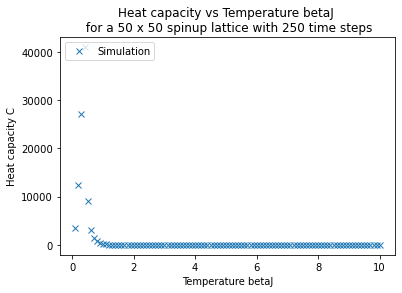

In [33]:
n = 100
betaJ_start = 0.1
betaJ_end = 10.0

betaJ_values = np.linspace(betaJ_start,betaJ_end,n) # betaJ values to plot

C_values = np.zeros(n)
for i in tqdm(range(n), desc="Processing", unit="iteration"):
    C_values[i] = calculate_heat_capacity(w=50,type='spinup',time_steps=250,betaJ=betaJ_values[i],betamuH=0)

plt.plot(betaJ_values,C_values,'x',label='Simulation')
plt.xlabel ('Temperature betaJ')
plt.ylabel ('Heat capacity C')
plt.legend(loc='upper left')
plt.title('Heat capacity vs Temperature betaJ \n for a 50 x 50 spinup lattice with 250 time steps')
plt.show()

#### Let's zoom in on the first few interesting points, as after betaJ > 1 nothing interesting happens

Processing: 100%|██████████| 100/100 [15:17<00:00,  9.18s/iteration]


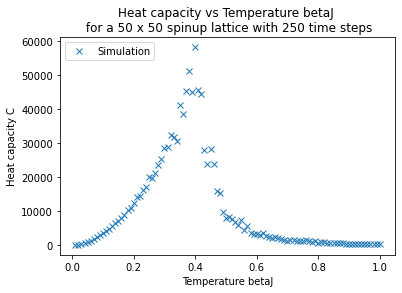

In [35]:
n = 100
betaJ_start = 0.01
betaJ_end = 1.00

betaJ_values = np.linspace(betaJ_start,betaJ_end,n) # betaJ values to plot

C_values = np.zeros(n)
for i in tqdm(range(n), desc="Processing", unit="iteration"):
    C_values[i] = calculate_heat_capacity(w=50,type='spinup',time_steps=250,betaJ=betaJ_values[i],betamuH=0)

plt.plot(betaJ_values,C_values,'x',label='Simulation')
plt.xlabel ('Temperature betaJ')
plt.ylabel ('Heat capacity C')
plt.legend(loc='upper left')
plt.title('Heat capacity vs Temperature betaJ \n for a 50 x 50 spinup lattice with 250 time steps')
plt.show()

### This works! For sanity checking, let's repeat for spindown now. Use the same range of temperature to consider for betaJ.

Processing: 100%|██████████| 100/100 [15:19<00:00,  9.19s/iteration]


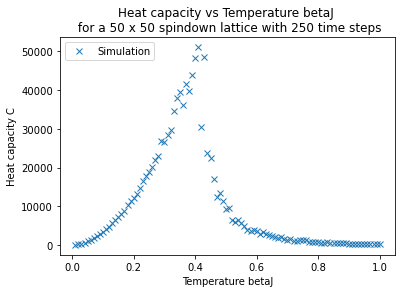

In [40]:
n = 100
betaJ_start = 0.01
betaJ_end = 1.00

betaJ_values = np.linspace(betaJ_start,betaJ_end,n) # betaJ values to plot

C_values = np.zeros(n)
for i in tqdm(range(n), desc="Processing", unit="iteration"):
    C_values[i] = calculate_heat_capacity(w=50,type='spindown',time_steps=250,betaJ=betaJ_values[i],betamuH=0)

plt.plot(betaJ_values,C_values,'x',label='Simulation')
plt.xlabel ('Temperature betaJ')
plt.ylabel ('Heat capacity C')
plt.legend(loc='upper left')
plt.title('Heat capacity vs Temperature betaJ \n for a 50 x 50 spindown lattice with 250 time steps')
plt.show()

### Now repeat the same for random lattice  in the same region.

Processing: 100%|██████████| 100/100 [22:54<00:00, 13.75s/iteration]


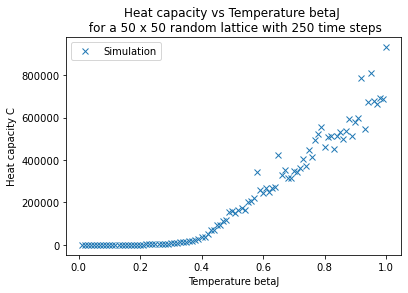

In [41]:
n = 100
betaJ_start = 0.01
betaJ_end = 1.00

betaJ_values = np.linspace(betaJ_start,betaJ_end,n) # betaJ values to plot

C_values = np.zeros(n)
for i in tqdm(range(n), desc="Processing", unit="iteration"):
    C_values[i] = calculate_heat_capacity(w=50,type='random',time_steps=250,betaJ=betaJ_values[i],betamuH=0)

plt.plot(betaJ_values,C_values,'x',label='Simulation')
plt.xlabel ('Temperature betaJ')
plt.ylabel ('Heat capacity C')
plt.legend(loc='upper left')
plt.title('Heat capacity vs Temperature betaJ \n for a 50 x 50 random lattice with 250 time steps')
plt.show()

Okay initializing a random lattice is weird hmmm. Let's not use it.

### Now we look at what happens close to the critical temperature 𝑇𝑐 for a number of different lattice sizes. Here Tc seems to be betaJ = 0.4 so we'll zoom in there.

Processing: 100%|██████████| 100/100 [41:18<00:00, 24.79s/iteration]


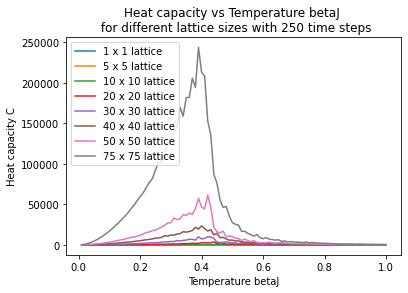

In [5]:
from tqdm import tqdm

w_array = np.array([1,5,10,20,30,40,50,75])
n = 100
betaJ_start = 0.01
betaJ_end = 1.00

betaJ_values = np.linspace(betaJ_start,betaJ_end,n) # betaJ values to plot


for i in range(len(w_array)):
    C_values = np.zeros((len(w_array),n))
    for j in tqdm(range(n), desc="Processing", unit="iteration"):
        C_values[i,j] = calculate_heat_capacity(w=w_array[i],type='spinup',time_steps=250,betaJ=betaJ_values[j],betamuH=0)
    plt.plot(betaJ_values,C_values[i,:],label='%.0f x %.0f lattice'%(w_array[i],w_array[i]))

plt.xlabel ('Temperature betaJ')
plt.ylabel ('Heat capacity C')
plt.legend(loc='upper left')
plt.title('Heat capacity vs Temperature betaJ \n for different lattice sizes with 250 time steps')
plt.show()

Close to the critical temperature betaJ, the heat capacity scales to infinite with a bigger lattice size.